<a href="https://colab.research.google.com/github/rituraj6908/tuberculosis_prediction_shenzhen/blob/main/shenzhen_tuberculosis_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tuberculosis Chest X-rays (Shenzhen)**

Link - https://www.kaggle.com/raddar/tuberculosis-chest-xrays-shenzhen

Total - 663

Normal (0) - 326

Tuberculosis (1) - 336

pixel size - 3k*3k



In [ ]:
# !pip install tensorflow-gpu

In [ ]:
# !nvidia-smi

In [ ]:
# importing all the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix


In [ ]:
# setting the data file path
dir_path = "/content/drive/MyDrive/Shenzhen_raw"
train_path = dir_path + "/images"
train_file = pd.read_csv("/content/drive/MyDrive/Shenzhen_raw/shenzhen_metadata_cat.csv")
save_checkpoint = dir_path+"/saved_models/"

In [ ]:
# total images in train folder
path_link, dirs, files = next(os.walk(train_path))
print(f'images: {len(files)}')
print(f"train file size: {train_file.shape}")
print(f"train file columns: {np.array(train_file.columns)}")
train_file.head()

images: 662
train file size: (662, 2)
train file columns: ['study_id' 'findings']


,study_id,findings
0,CHNCXR_0001_0.png,normal
1,CHNCXR_0002_0.png,normal
2,CHNCXR_0003_0.png,normal
3,CHNCXR_0004_0.png,normal
4,CHNCXR_0005_0.png,normal


In [ ]:
# function to create cnn model

def get_model(image_size):
  model = Sequential([
    # input size should be similar to image size with 3 byte color (RGB)
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(image_size, image_size, 3)), #convulational layer
    MaxPool2D(pool_size=(2,2), strides=2), #max-pooling layer

    # Conv2D(filters=32, kernel_size=(3,3), activation='relu'), 
    # MaxPool2D(pool_size=(2,2), strides=2),

    # Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    # MaxPool2D(pool_size=(2,2), strides=2),

    # Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    # MaxPool2D(pool_size=(2,2), strides=2),

    # Flatten the result to feed into DNN
    Flatten(),

    # Dense(units=128, activation='relu'),
    # Dense(units=128, activation='relu'),
    Dense(units=2, activation='sigmoid') # sigmoid activation function is used because it is a binary classification
  ])
  model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=['accuracy'])

  return model

In [ ]:
# function to get model name

def get_model_name(k):
  return 'model_'+str(k)+'.h5'

In [ ]:
# function to plot training result

def show_history_result(history):
  print("-------- Accuracy result --------")
  print(f"Mean accuracy: {np.mean(history.history['accuracy'])}")
  print(f"Std of accuracy: {np.std(history.history['accuracy'])}")
  print()
  print(f"Mean val_accuracy: {np.mean(history.history['val_accuracy'])}")
  print(f"Std of val_accuracy: {np.std(history.history['val_accuracy'])}")
  print()

  # plot accuracy vs val_accuracy over the num_epochs
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracies')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.show()


  print("\n\n")


  print("-------- Loss result --------")
  print(f"Mean loss: {np.mean(history.history['loss'])}")
  print(f"Std of loss: {np.std(history.history['loss'])}")
  print()
  print(f"Mean val_loss {np.mean(history.history['val_loss'])}")
  print(f"Std of val_loss: {np.std(history.history['val_loss'])}")
  print()

  # plot loss vs val_loss over the num_epochs
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.show()

In [ ]:
# training variables
image_size = 512
num_batches = 10
num_epochs = 15
n_folds = 5

# spliting class and label
train_y = train_file.findings
train_x = train_file.drop(['findings'], axis=1)

In [ ]:
# variable to store result
train_accuracy = []
train_loss = []
data_kfold = pd.DataFrame()
fold_var = 1

In [ ]:
# Intiliazing kfold cross validation
kfold = StratifiedKFold(n_splits = n_folds, shuffle=True, random_state=42)

Found 529 validated image filenames belonging to 2 classes.
Found 133 validated image filenames belonging to 2 classes.
Epoch 1/15
53/53 [==============================] - ETA: 0s - loss: 3.4078 - accuracy: 0.5747
Epoch 1: val_accuracy improved from -inf to 0.49624, saving model to /content/drive/MyDrive/Shenzhen_raw/saved_models/model_1.h5
53/53 [==============================] - 175s 3s/step - loss: 3.4078 - accuracy: 0.5747 - val_loss: 2.6784 - val_accuracy: 0.4962
Epoch 2/15
53/53 [==============================] - ETA: 0s - loss: 1.1954 - accuracy: 0.6692
Epoch 2: val_accuracy improved from 0.49624 to 0.55639, saving model to /content/drive/MyDrive/Shenzhen_raw/saved_models/model_1.h5
53/53 [==============================] - 169s 3s/step - loss: 1.1954 - accuracy: 0.6692 - val_loss: 1.1441 - val_accuracy: 0.5564
Epoch 3/15
53/53 [==============================] - ETA: 0s - loss: 0.7741 - accuracy: 0.6862
Epoch 3: val_accuracy improved from 0.55639 to 0.75188, saving model to /cont

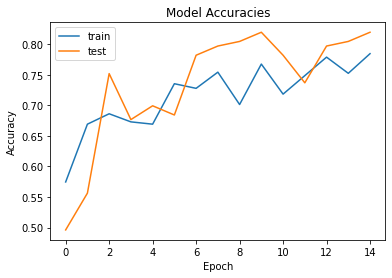




-------- Loss result --------
Mean loss: 0.853015794356664
Std of loss: 0.7123547805043274

Mean val_loss 0.761134672164917
Std of val_loss: 0.5481271701329331



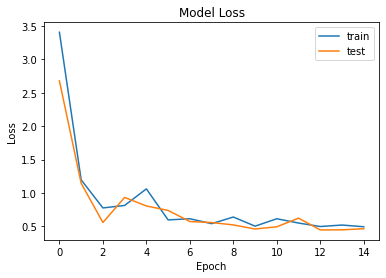

Found 662 validated image filenames.
21/21 [==============================] - 77s 4s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Found 529 validated image filenames belonging to 2 classes.
Found 133 validated image filenames belonging to 2 classes.
Epoch 1/15
53/53 [==============================] - ETA: 0s - loss: 1.3135 - accuracy: 0.5047
Epoch 1: val_accuracy improved from -inf to 0.71429, saving model to /content/drive/MyDrive/Shenzhen_raw/saved_models/model_2.h5
53/53 [==============================] - 166s 3s/step - loss: 1.3135 - accuracy: 0.5047 - val_loss: 0.5008 - val_accuracy: 0.7143
Epoch 2/15
53/53 [==============================] - ETA: 0s - loss: 0.9222 - accuracy: 0.6257
Epoch 2: val_accuracy improved from 0.71429 to 0.79699, saving model to /content/drive/MyDrive/Shenzhen_raw/saved_models/model_2.h5
53/53 [==============================] - 155s 3s/step - loss: 0.9222 - accuracy: 0.6257 - val_loss: 0.4291 - val_accuracy: 0.7970
Epoch 3/15
53/53 [=====================

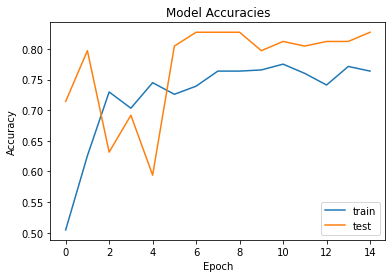




-------- Loss result --------
Mean loss: 0.6139343698819478
Std of loss: 0.2126115849044936

Mean val_loss 0.5035701334476471
Std of val_loss: 0.14227271370409636



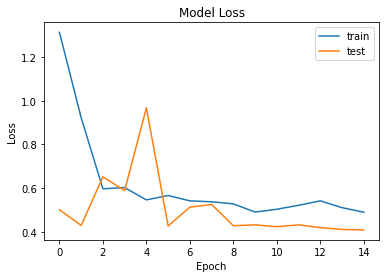

Found 662 validated image filenames.
21/21 [==============================] - 76s 4s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Found 530 validated image filenames belonging to 2 classes.
Found 132 validated image filenames belonging to 2 classes.
Epoch 1/15
53/53 [==============================] - ETA: 0s - loss: 3.4989 - accuracy: 0.5623
Epoch 1: val_accuracy improved from -inf to 0.50758, saving model to /content/drive/MyDrive/Shenzhen_raw/saved_models/model_3.h5
53/53 [==============================] - 159s 3s/step - loss: 3.4989 - accuracy: 0.5623 - val_loss: 1.8376 - val_accuracy: 0.5076
Epoch 2/15
53/53 [==============================] - ETA: 0s - loss: 1.0201 - accuracy: 0.6642
Epoch 2: val_accuracy improved from 0.50758 to 0.54545, saving model to /content/drive/MyDrive/Shenzhen_raw/saved_models/model_3.h5
53/53 [==============================] - 161s 3s/step - loss: 1.0201 - accuracy: 0.6642 - val_loss: 0.9739 - val_accuracy: 0.5455
Epoch 3/15
53/53 [=====================

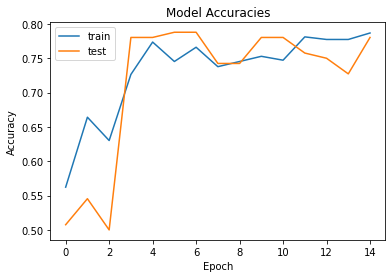




-------- Loss result --------
Mean loss: 0.8317959547042847
Std of loss: 0.7402233324210239

Mean val_loss 0.744419664144516
Std of val_loss: 0.5362301144335809



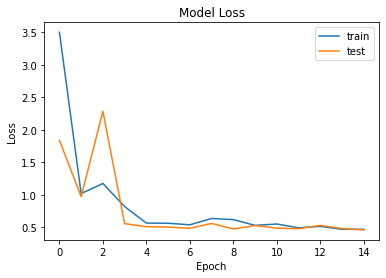

Found 662 validated image filenames.
21/21 [==============================] - 77s 4s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Found 530 validated image filenames belonging to 2 classes.
Found 132 validated image filenames belonging to 2 classes.
Epoch 1/15
53/53 [==============================] - ETA: 0s - loss: 1.2617 - accuracy: 0.5792
Epoch 1: val_accuracy improved from -inf to 0.62121, saving model to /content/drive/MyDrive/Shenzhen_raw/saved_models/model_4.h5
53/53 [==============================] - 163s 3s/step - loss: 1.2617 - accuracy: 0.5792 - val_loss: 0.7627 - val_accuracy: 0.6212
Epoch 2/15
53/53 [==============================] - ETA: 0s - loss: 0.6488 - accuracy: 0.7094
Epoch 2: val_accuracy improved from 0.62121 to 0.80303, saving model to /content/drive/MyDrive/Shenzhen_raw/saved_models/model_4.h5
53/53 [==============================] - 155s 3s/step - loss: 0.6488 - accuracy: 0.7094 - val_loss: 0.5510 - val_accuracy: 0.8030
Epoch 3/15
53/53 [=====================

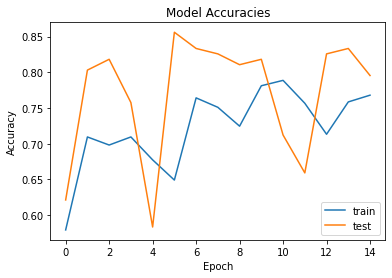




-------- Loss result --------
Mean loss: 0.6196508785088857
Std of loss: 0.1868728930382901

Mean val_loss 0.495941686630249
Std of val_loss: 0.10172535127145671



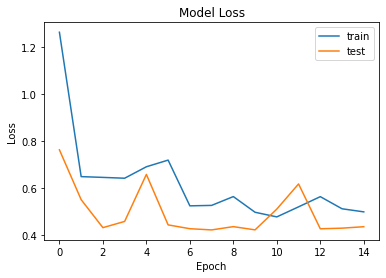

Found 662 validated image filenames.
21/21 [==============================] - 78s 4s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Found 530 validated image filenames belonging to 2 classes.
Found 132 validated image filenames belonging to 2 classes.
Epoch 1/15
53/53 [==============================] - ETA: 0s - loss: 0.8260 - accuracy: 0.6509
Epoch 1: val_accuracy improved from -inf to 0.78788, saving model to /content/drive/MyDrive/Shenzhen_raw/saved_models/model_5.h5
53/53 [==============================] - 162s 3s/step - loss: 0.8260 - accuracy: 0.6509 - val_loss: 0.5188 - val_accuracy: 0.7879
Epoch 2/15
53/53 [==============================] - ETA: 0s - loss: 0.5832 - accuracy: 0.7094
Epoch 2: val_accuracy did not improve from 0.78788
53/53 [==============================] - 154s 3s/step - loss: 0.5832 - accuracy: 0.7094 - val_loss: 0.5279 - val_accuracy: 0.7500
Epoch 3/15
53/53 [==============================] - ETA: 0s - loss: 0.5482 - accuracy: 0.7415
Epoch 3: val_accuracy did 

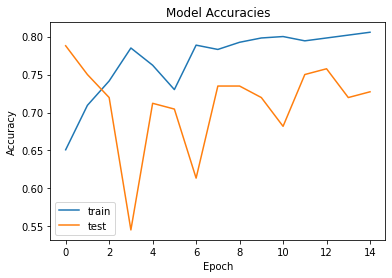




-------- Loss result --------
Mean loss: 0.5138425866762797
Std of loss: 0.0917189389338432

Mean val_loss 0.6051714619000753
Std of val_loss: 0.10898767772382142



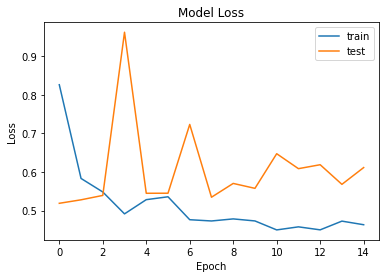

Found 662 validated image filenames.
21/21 [==============================] - 81s 4s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [ ]:
# cross validation training and testing

for train_idx, val_idx in kfold.split(train_x, train_y):
  training_data = train_file.iloc[train_idx]
  validation_data = train_file.iloc[val_idx]

  train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

  training_set = train_datagen.flow_from_dataframe(training_data, 
                                                   directory=train_path, 
                                                   x_col="study_id",
                                                   y_col="findings",
                                                   class_mode="categorical",
                                                   target_size=(image_size, image_size),
                                                   batch_size=num_batches,
                                                   shuffle=True)
  

  validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
  validation_set = validation_datagen.flow_from_dataframe(validation_data, 
                                                   directory=train_path, 
                                                   x_col="study_id",
                                                   y_col="findings",
                                                   class_mode="categorical",
                                                   target_size=(image_size, image_size),
                                                   batch_size=num_batches,
                                                   shuffle=True)
  
  # creating new model
  model = get_model(image_size)

  # creating checkpoints and storing the best one
  checkpoints = ModelCheckpoint(save_checkpoint+get_model_name(fold_var),
                                monitor='val_accuracy',
                                verbose=1,
                                save_best_only=True,
                                mode='max')
  
  callbacks_list = [checkpoints]

  history = model.fit(training_set,
                      epochs=num_epochs,
                      callbacks=callbacks_list,
                      validation_data=validation_set,
                      verbose=1)
  
  # plotting and printing the history result
  show_history_result(history)

  # here test set is entire dataset
  # initializing new data generator for test set
  test_datagen = ImageDataGenerator(rescale=1.0/255.0)

  # create test set (entire dataset) 
  test_set = test_datagen.flow_from_dataframe(train_file,
                                              directory=train_path,
                                              x_col='study_id',
                                              y_col=None,
                                              class_mode=None,
                                              target_size=(image_size,image_size))

  # loading the best model of current fold for evaluating the model on the entire dataset
  model.load_weights(save_checkpoint+get_model_name(fold_var))


  results = model.evaluate(test_set)
  results = dict(zip(model.metrics_names, results))

  train_accuracy.append(results['accuracy'])
  train_loss.append(results['loss'])

  # predict 
  pred = model.predict(test_set)
  predicted_class_indices=np.argmax(pred,axis=1)
  data_kfold[fold_var] = predicted_class_indices

  fold_var += 1


